# Nhập môn khoa học dữ liệu đồ án cuối kỳ _ Nhóm 12

Thông tin nhóm:
- 22120367 - Lê Hồng Tiến
- 22120380 - Hồ Nhất Trí
- 22120382 - Nguyễn Anh Trí
- 22120395 - Nguyễn Sinh Trực
- 22120399 - Nguyễn Lê Anh Tú


## Thu thập dữ liệu

## Khai báo các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk

## Tiền xử lý dữ liệu
### Đọc dữ liệu từ file vào dataframe.

In [2]:
file_name = 'arxiv_cs_papers_all.csv'
raw_df = pd.read_csv(file_name)
raw_df.head()

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,http://arxiv.org/abs/2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,http://arxiv.org/abs/2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,http://arxiv.org/abs/2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,http://arxiv.org/abs/2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available


### Có bao nhiêu dòng và cột của bộ dữ liệu thô này?

**Kiểm tra bộ dữ liệu đã đạt yêu cầu phải có ít nhất 5 cột và 1000 dòng hay chưa, nếu chưa thì ta sẽ cào bộ dữ liệu mới liên quan đến chủ đề này.**

In [3]:
#ta sẽ tính số dòng và số cột của DataFrame 'raw_df' và lưu trữ nó vào biến 'shape'.
shape = raw_df.shape

In [4]:
print(f"Kích thước dữ liệu hiện tại: {shape}")

if shape[0] >= 1000 and shape[1] >= 5:
    print("Dữ liệu của chúng ta đạt yêu cầu: đủ số dòng và số cột!")
else:
    print("Dữ liệu không đủ. Vui lòng chọn một tập dữ liệu khác!")

Kích thước dữ liệu hiện tại: (354972, 8)
Dữ liệu của chúng ta đạt yêu cầu: đủ số dòng và số cột!


### Mỗi dòng và cột có ý nghĩa gì?

 Mỗi dòng trong tập dữ liệu tương ứng với thông tin về một bài báo khoa học được công bố trên arXiv, bao gồm các cột:

- paper_id: Định danh bài báo, thường là một URL hoặc mã duy nhất của bài báo trên arXiv.
- authors: Danh sách tác giả của bài báo, mỗi tác giả được ngăn cách bởi dấu phẩy.
- updated: Thời gian cập nhật cuối cùng của bài báo, định dạng YYYY-MM-DD HH:MM:SS.
- published: Thời gian xuất bản lần đầu của bài báo, định dạng YYYY-MM-DD HH:MM:SS.
- title: Tiêu đề bài báo, cung cấp cái nhìn tổng quan về nội dung bài báo.
- abstract: Tóm tắt bài báo, cung cấp một đoạn ngắn mô tả nội dung chính.
- categories: Các danh mục mà bài báo thuộc về, giúp phân loại lĩnh vực nghiên cứu.
- comment: Ghi chú bổ sung hoặc thông tin thêm về bài báo (như là bài báo đã được đăng công khai trước đó ở đâu).

#### Dữ liệu thô có dòng nào bị trùng không?

In [5]:
#chúng ta tính toán số dòng bị trùng và lưu trữ nó vào biến 'num_duplicated_rows'.
num_duplicated_rows = raw_df[raw_df.duplicated()].shape[0]

In [6]:
if num_duplicated_rows == 0:
    print("Dữ liệu gốc của bạn không có dòng trùng lặp!")
else:
    if num_duplicated_rows > 1:
        ext = "lines"
    else:
        ext = "line"
    print(f"Dữ liệu gốc của bạn có {num_duplicated_rows} {ext} bị trùng lặp. Vui lòng loại bỏ các dòng trùng lặp!")

Dữ liệu gốc của bạn không có dòng trùng lặp!


In [7]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,http://arxiv.org/abs/2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,http://arxiv.org/abs/2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,http://arxiv.org/abs/2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,http://arxiv.org/abs/2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available
...,...,...,...,...,...,...,...,...
354967,http://arxiv.org/abs/2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG,cs.AI",Accepted by CVPR2024
354968,http://arxiv.org/abs/2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI,cs.LG,stat.ME",Not available
354969,http://arxiv.org/abs/2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG,cs.AI",Not available
354970,http://arxiv.org/abs/2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG,cs.AI",Recent evidence has emerged that directly cont...


#### Kiểm tra số lượng dòng thiếu dữ liệu trong toàn bộ DataFrame

In [8]:
missing_rows = raw_df.isnull().any(axis=1).sum()

if missing_rows > 0:
    print(f"Có {missing_rows} dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!")
else:
    print("Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.")

Có 34 dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!


#### In ra dòng bị thiếu dữ liệu

In [9]:
missing_data = raw_df[raw_df.isnull().any(axis=1)]
print(missing_data)

                                 paper_id  \
13661   http://arxiv.org/abs/2409.02702v2   
17293   http://arxiv.org/abs/2407.21233v1   
35222   http://arxiv.org/abs/2402.01733v1   
40374   http://arxiv.org/abs/2408.16885v1   
43590   http://arxiv.org/abs/2402.19107v1   
43894   http://arxiv.org/abs/2402.06516v1   
50502   http://arxiv.org/abs/2210.12964v1   
53966   http://arxiv.org/abs/2201.03052v1   
66621   http://arxiv.org/abs/2411.00826v1   
70366   http://arxiv.org/abs/2409.08170v1   
73754   http://arxiv.org/abs/2407.16424v1   
85417   http://arxiv.org/abs/2112.08910v3   
89831   http://arxiv.org/abs/2006.01381v1   
156214  http://arxiv.org/abs/2308.15509v1   
160119  http://arxiv.org/abs/2202.02915v1   
160753  http://arxiv.org/abs/2109.12442v1   
170229  http://arxiv.org/abs/2307.07321v2   
171425  http://arxiv.org/abs/2304.08597v1   
173680  http://arxiv.org/abs/2201.12544v1   
188249  http://arxiv.org/abs/2309.08441v1   
201563  http://arxiv.org/abs/1907.06086v2   
228873  ht

Ở đây ta có thể thấy cột comment của 34 dòng này không có thông tin và đang là NaN, có thể xử lý bằng cách xóa 34 dòng này hoặc điền và 34 dòng này ở cột commet là 'không có thông tin'

In [10]:
# điền vào commet của 34 cột
raw_df['comment'] = raw_df['comment'].fillna('Not available')

Kiểm tra xem còn thiếu dữ liệu hay không?

In [11]:
missing_rows = raw_df.isnull().any(axis=1).sum()

if missing_rows > 0:
    print(f"Có {missing_rows} dòng bị thiếu dữ liệu ở ít nhất một cột. Vui lòng xử lý!")
else:
    print("Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.")

Dữ liệu hoàn chỉnh, không có dòng nào bị thiếu dữ liệu.


#### Kiểu dữ liệu của mỗi cột hiện tại là gì? Có bao nhiêu cột có kiểu dữ liệu không phù hợp cho việc phân tích sau này?

In [12]:
# chúng ta sẽ xem xét kiểu dữ liệu (dtype) của mỗi cột trong DataFrame 'raw_df'
# và lưu kết quả vào Series 'dtypes' (Series này có index là tên cột trong DataFrame).
dtypes = raw_df.dtypes

In [13]:
dtypes

paper_id      object
authors       object
updated       object
published     object
title         object
abstract      object
categories    object
comment       object
dtype: object

Hiện tại, chúng ta thấy rằng cột update và published đang ở dạng chuỗi (object). Đây là cột thể hiện ngày tháng, nên chuyển sang kiểu dữ liệu datetime sẽ giúp:

Dễ dàng thực hiện các phép tính liên quan đến thời gian (ví dụ: so sánh ngày, tính khoảng cách giữa các ngày).
Hỗ trợ trực quan hóa dữ liệu dạng chuỗi thời gian (time-series).

Các cột còn lại vẫn giữ nguyên object.

In [14]:
raw_df['updated'] = pd.to_datetime(raw_df['updated'])
raw_df['published'] = pd.to_datetime(raw_df['published'])

In [15]:
dtypes = raw_df.dtypes
dtypes

paper_id              object
authors               object
updated       datetime64[ns]
published     datetime64[ns]
title                 object
abstract              object
categories            object
comment               object
dtype: object

### Đối với mỗi cột có kiểu dữ liệu datetime64[ns], những giá trị trong các cột đó phân bố như thế nào?

In [16]:
# Tính các thống kê cho cột 'update'
count_u = raw_df['updated'].notnull().sum()  # Số lượng giá trị không thiếu
unique_u = raw_df['updated'].nunique()  # Số lượng giá trị duy nhất
top_u = raw_df['updated'].mode()[0]  # Giá trị xuất hiện nhiều nhất
freq_u = raw_df['updated'].value_counts().max()  # Số lần giá trị xuất hiện nhiều nhất
min_value_u = raw_df['updated'].min()  # Giá trị nhỏ nhất
max_value_u = raw_df['updated'].max()  # Giá trị lớn nhất
mean_u = raw_df['updated'].mean()  # Trung bình
std_u = raw_df['updated'].std()  # Độ lệch chuẩn
percentiles_u = raw_df['updated'].quantile([0.25, 0.5, 0.75])  # Các phân vị

# Tính các thống kê cho cột 'published'
count_p = raw_df['published'].notnull().sum()  # Số lượng giá trị không thiếu
unique_p = raw_df['published'].nunique()  # Số lượng giá trị duy nhất
top_p = raw_df['published'].mode()[0]  # Giá trị xuất hiện nhiều nhất
freq_p = raw_df['published'].value_counts().max()  # Số lần giá trị xuất hiện nhiều nhất
min_value_p = raw_df['published'].min()  # Giá trị nhỏ nhất
max_value_p = raw_df['published'].max()  # Giá trị lớn nhất
mean_p = raw_df['published'].mean()  # Trung bình
std_p = raw_df['published'].std()  # Độ lệch chuẩn
percentiles_p = raw_df['published'].quantile([0.25, 0.5, 0.75])  # Các phân vị

# In ra kết quả
print(f"Count_u: {count_u}, Count_p: {count_p}")
print(f"Unique_u: {unique_u}, unique_p: {unique_p} ")
print(f"Top_u: {top_u}, Top_p: {top_p}")
print(f"Freq_u: {freq_u}, Freq_p: {freq_p}")
print(f"Min_u: {min_value_u}, Min_p: {min_value_p}")
print(f"Max_u: {max_value_u}, Max_p: {max_value_p}")
print(f"Mean_u: {mean_u}, Mean_p: {mean_p}")
print(f"Std_u: {std_u}, Std_p:{std_p}")
print(f"25%_u: {percentiles_u[0.25]}, 25%_p: {percentiles_p[0.25]}")
print(f"50%_u: {percentiles_u[0.5]}, 50%_p: {percentiles_p[0.5]}")
print(f"75%_u: {percentiles_u[0.75]}, 75%_p: {percentiles_p[0.75]}")

Count_u: 354972, Count_p: 354972
Unique_u: 354482, unique_p: 354230 
Top_u: 2012-06-27 19:59:59, Top_p: 2012-06-27 19:59:59
Freq_u: 12, Freq_p: 12
Min_u: 1994-11-15 00:00:00, Min_p: 1994-11-15 00:00:00
Max_u: 2024-12-16 18:59:53, Max_p: 2024-12-16 18:59:53
Mean_u: 2021-04-16 09:24:30.443265536, Mean_p: 2021-01-13 17:01:16.984601344
Std_u: 1469 days 01:52:21.593811040, Std_p:1482 days 08:31:11.993179952
25%_u: 2019-11-07 09:49:58.500000, 25%_p: 2019-07-02 14:16:23.249999872
50%_u: 2022-07-21 16:14:07.500000, 50%_p: 2022-04-03 02:33:53
75%_u: 2024-05-14 17:49:51.249999872, 75%_p: 2024-02-19 12:39:33.249999872


Kết quả này cho thấy:
**Các chỉ số thời gian liên quan đến hai giá trị (updated và published)**:

Số lượng và giá trị duy nhất:

- Count_u và Count_p (354972): Tổng số bản ghi trong tập dữ liệu.
- Unique_u (354482) và unique_p (354230): Hầu hết các bản ghi đều có thời gian riêng biệt, chỉ một số ít bị trùng lặp.

**Phân bố thời gian**:
Khoảng thời gian:
- Min_u và Max_u: Dữ liệu trải dài từ năm 1994 đến 2024, cho thấy đây là dữ liệu lâu dài.
- Mean_u và Mean_p: Trung bình ngày nằm trong khoảng 2021, tập trung vào các nghiên cứu gần đây.
- Std_u (1469 ngày) và Std_p (1482 ngày): Thời gian phân phối khá đồng đều trong khoảng thời gian lớn (~4 năm).
Phân vị:
- 25%_u và 25%_p: 25% dữ liệu cũ hơn ngày 2019, còn lại là dữ liệu sau đó.
- 50%_u và 50%_p (median): Giá trị trung vị của dữ liệu rơi vào 2022-2023, cho thấy dữ liệu khá hiện đại.
- 75%_u và 75%_p: Phần lớn dữ liệu thuộc giai đoạn 2024.

### Đối với mỗi cột có kiểu dữ liệu non-numeric, những giá trị trong các cột đó phân bố như thế nào?

- Tính tỷ lệ phần trăm các giá trị bị thiếu (missing values): Tỷ lệ phần trăm từ 0 đến 100 của các ô bị thiếu dữ liệu trong từng cột.
- Số lượng các giá trị khác nhau (unique values): Ta đếm số lượng các loại giá trị khác nhau (số lượng phần tử phân biệt) trong cột.

- Tỷ lệ phần trăm của từng giá trị khác nhau trong cột (không xét giá trị thiếu): Tính tỷ lệ phần trăm của mỗi giá trị trong tổng số giá trị không bị thiếu. Sắp xếp tỷ lệ theo thứ tự giảm dần.

- Lưu kết quả này vào dạng dictionary, trong đó: Key là các giá trị khác nhau trong cột, Value là tỷ lệ phần trăm của từng giá trị.


In [17]:
cat_cols = raw_df.select_dtypes(exclude=['datetime64[ns]'])
cat_col_info_df = pd.DataFrame(index=["missing_ratio", "num_values", "value_ratios"], columns=cat_cols.columns)
for col in cat_cols.columns:
    missing_ratio = cat_cols[col].isna().mean() * 100

    num_values = cat_cols[col].nunique(dropna=True)

    value_ratios = cat_cols[col].value_counts(normalize=True, dropna=True) * 100
    value_ratios = value_ratios.round(1).to_dict()

    cat_col_info_df.at["missing_ratio", col] = round(missing_ratio, 1)
    cat_col_info_df.at["num_values", col] = num_values
    cat_col_info_df.at["value_ratios", col] = value_ratios

In [18]:
cat_col_info_df

,paper_id,authors,title,abstract,categories,comment
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,354972,314096,354578,354688,56794,138075
value_ratios,"{'http://arxiv.org/abs/2405.16511v1': 0.0, 'ht...","{'Oliver Knill': 0.0, 'Sabah Al-Fedaghi': 0.0,...",{'No Argument Left Behind: Overlapping Chunks ...,{' This paper has been withdrawn by the autho...,"{'cs.CV': 2.8, 'cs.NI': 2.7, 'cs.RO': 2.6, 'ee...","{'Not available': 42.5, '10 pages': 0.2, '12 p..."


- Dữ liệu có tính đa dạng cao với nhiều giá trị khác nhau trong các cột.

- Một số cột chứa giá trị phổ biến với tỷ lệ cao, trong khi các giá trị còn lại có tỷ lệ rất thấp.

- Sự xuất hiện của 'Not available' với tỷ lệ lớn trong một cột có thể ảnh hưởng đến kết quả phân tích sau này và cần được xử lý hoặc xem xét kỹ hơn.

### Dữ liệu được thu thập có hợp lý chưa?

In [19]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,http://arxiv.org/abs/2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,http://arxiv.org/abs/2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,http://arxiv.org/abs/2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,http://arxiv.org/abs/2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,http://arxiv.org/abs/2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available
...,...,...,...,...,...,...,...,...
354967,http://arxiv.org/abs/2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG,cs.AI",Accepted by CVPR2024
354968,http://arxiv.org/abs/2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI,cs.LG,stat.ME",Not available
354969,http://arxiv.org/abs/2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG,cs.AI",Not available
354970,http://arxiv.org/abs/2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG,cs.AI",Recent evidence has emerged that directly cont...


#### Ở đây ta thấy ở cột paper_id là các đường dẫn URL ta có thể lọc lấy định danh duy nhất từ đường dẫn.

In [20]:
raw_df["paper_id"] = raw_df["paper_id"].str.split("/").str[-1]
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment
0,2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV,cs.AI,cs.LG",Code is available at: https://github.com/zuosc...
1,2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV,cs.AI,cs.LG,cs.RO",Code is available at: https://github.com/wzzhe...
2,2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG,cs.AI","11 pages, 4 figures, extended version of AAAI ..."
3,2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV,cs.AI",https://apollo-lmms.github.io
4,2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG,cs.AI",Not available
...,...,...,...,...,...,...,...,...
354967,2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG,cs.AI",Accepted by CVPR2024
354968,2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI,cs.LG,stat.ME",Not available
354969,2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG,cs.AI",Not available
354970,2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG,cs.AI",Recent evidence has emerged that directly cont...


## Kham phá dữ liệu

 ### 1. Số lượng chủ đề trong mỗi bài báo là bao nhiêu?

In [21]:
raw_df["topic_count"] = raw_df["categories"].apply(lambda x : len(x.split(',')))
raw_df["topic_count"].value_counts()

2     119311
1      95860
3      79590
4      32026
5      14099
6       6599
7       3288
8       1841
9        962
10       587
11       343
12       179
13        95
14        62
17        38
15        32
16        21
18        16
19        11
20         4
23         2
21         2
22         2
25         1
26         1
Name: topic_count, dtype: int64

/home/sinhtruc/miniconda3/envs/min_ds-env2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

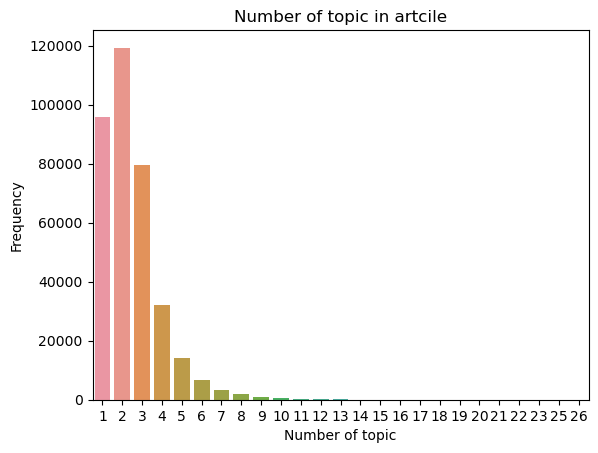

In [22]:
sns.countplot(raw_df["topic_count"])
plt.title("Number of topic in artcile")
plt.xlabel("Number of topic")
plt.ylabel("Frequency")

**Nhận xét:**
Dựa vào biểu đồ trực quan ở trên ta có thể nhận ra rằng đa phần mỗi bài báo đều có từ 1 đến 5 chủ đề là nhiều. Trong đó loại bài báo có hai chủ đề là nhiều nhất có 119311 bài báo có 2 chủ đề. Và có 1 bài báo có 26 chủ đề.

### 2. Chủ đề công nghệ thông tin có bao phủ hết tập dữ liệu không?

Lọc đi những chủ đề không liên quan tới công nghệ thông tin vẫn giữ lại bài báo.

In [23]:
def filter_cs_categories(category_list):
    return [cat.strip() for cat in category_list if cat.strip().startswith('cs.')]

raw_df['categories'] = raw_df['categories'].str.split(',').apply(filter_cs_categories)

raw_df['categories'] = raw_df['categories'].apply(lambda x: ', '.join(x))

empty = raw_df['categories'].apply(lambda x: len(x.strip()) > 0).sum()

print(f"Số ô không trống trong cột 'categories': {empty}")

print(raw_df.shape)

Số ô không trống trong cột 'categories': 354972
(354972, 9)


Vậy ta thấy số ô không trống ở categories là 354972 bằng với số ô ban đầu chưa xóa chủ đề, điều đó có nghĩa rằng là chủ đề công nghệ thông tin bảo phủ toàn bộ tập dữ liệu.

In [24]:
raw_df[['paper_id', 'categories']]

,paper_id,categories
0,2412.10373v1,"cs.CV, cs.AI, cs.LG"
1,2412.10371v1,"cs.CV, cs.AI, cs.LG, cs.RO"
2,2402.01886v2,"cs.LG, cs.AI"
3,2412.10360v1,"cs.CV, cs.AI"
4,2412.10354v1,"cs.LG, cs.AI"
...,...,...
354967,2405.16585v1,"cs.LG, cs.AI"
354968,2404.14786v2,"cs.AI, cs.LG"
354969,2405.16557v1,"cs.LG, cs.AI"
354970,2304.05749v2,"cs.LG, cs.AI"


Kiểm tra lại số lượng chủ đề tối đa có trong một bài báo và bài báo có bao nhiêu chủ đề là chiếm đa số?

In [25]:
raw_df["topic_count"] = raw_df["categories"].apply(lambda x : len(x.split(',')))
raw_df["topic_count"].value_counts()

1    186238
2    115213
3     42121
4      9702
5      1652
6        40
7         5
8         1
Name: topic_count, dtype: int64

/home/sinhtruc/miniconda3/envs/min_ds-env2/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

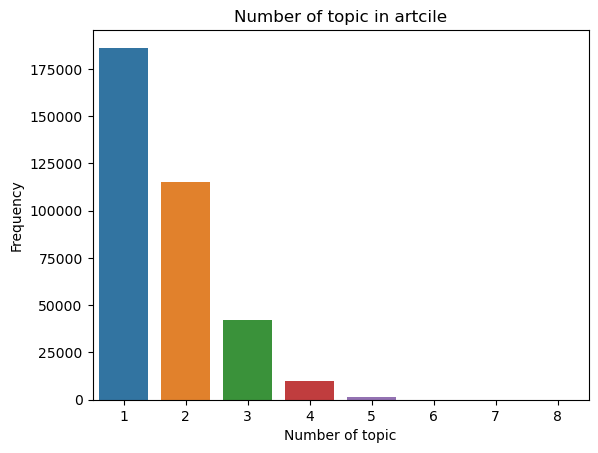

In [26]:
sns.countplot(raw_df["topic_count"])
plt.title("Number of topic in artcile")
plt.xlabel("Number of topic")
plt.ylabel("Frequency")

### 3. Xu hướng xuất bản bài viết theo thời gian như thế nào? Có tăng lên theo từng năm hay không?

In [27]:
raw_df['published_year'] = raw_df['published'].dt.year
publication_trend = raw_df['published_year'].value_counts().sort_index()

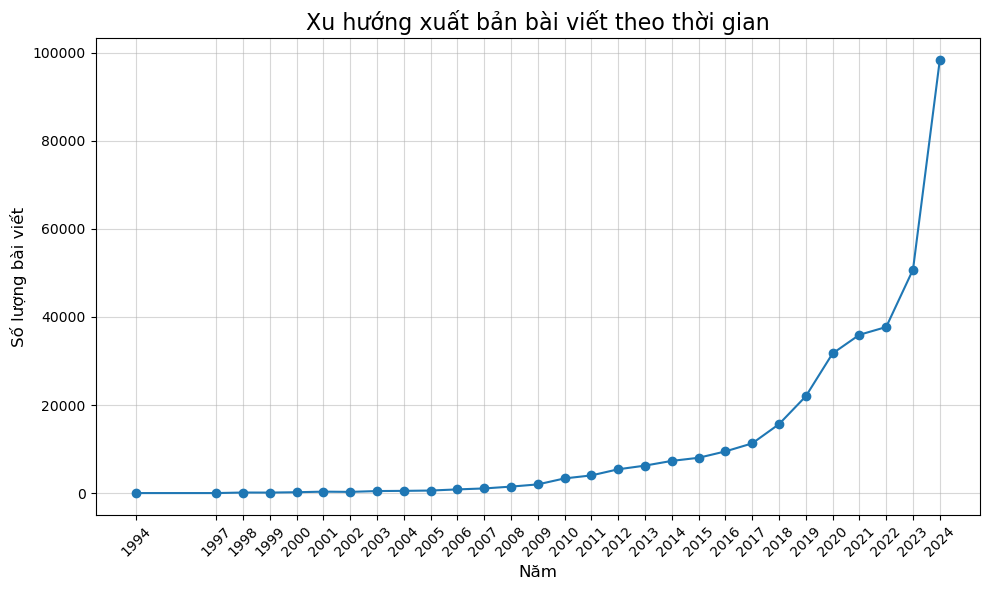

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(publication_trend.index, publication_trend.values, marker='o', linestyle='-')
plt.title("Xu hướng xuất bản bài viết theo thời gian", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Số lượng bài viết", fontsize=12)
plt.grid(alpha=0.5)
plt.xticks(publication_trend.index, rotation=45)
plt.tight_layout()
plt.show()

**Nhận xét về xu hướng xuất bản bài viết theo thời gian:**

- Xu hướng tăng trưởng theo thời gian: Số lượng bài viết được xuất bản tăng rất ít và ổn định trong giai đoạn 1994 - 2010. Từ năm 2010 trở đi, số lượng bài viết bắt đầu tăng dần và có dấu hiệu tăng trưởng nhanh hơn. Giai đoạn 2017 - 2024 chứng kiến sự bùng nổ mạnh mẽ về số lượng bài viết, đặc biệt từ năm 2020 trở đi, đường biểu diễn cho thấy tốc độ tăng trưởng gần như theo cấp số nhân.

- Bùng nổ trong những năm gần đây (2020 - 2024): Số lượng bài viết tăng đột biến, từ khoảng hơn 20,000 bài viết vào năm 2019 lên hơn 50,000 vào năm 2023. Năm 2024 dự đoán sẽ đạt mức kỷ lục, gần 100,000 bài viết.

**Nguyên nhân có thể dẫn đến sự tăng trưởng mạnh:**

- Phát triển công nghệ và trí tuệ nhân tạo (AI): Xu hướng nghiên cứu và xuất bản trong các lĩnh vực mới như AI, Machine Learning, và Khoa học dữ liệu thúc đẩy số lượng bài viết tăng mạnh.

- Mở rộng các nền tảng xuất bản trực tuyến: Các nền tảng mở như arXiv đã tạo điều kiện thuận lợi cho việc chia sẻ nghiên cứu nhanh chóng và rộng rãi.

- Sự gia tăng của các nhà nghiên cứu và tổ chức khoa học: Cộng đồng nghiên cứu khoa học ngày càng lớn mạnh và đóng góp nhiều bài viết hơn.

**Giai đoạn ổn định trước năm 2010:** Trước năm 2010, số lượng bài viết tăng rất chậm và ổn định, cho thấy mức độ xuất bản nghiên cứu khoa học còn hạn chế.

### 4. Top 10 tác giả có số lượng bài viết cao nhất trong toàn bộ tập dữ liệu?

In [29]:
authors_split = raw_df['authors'].str.split(',')
author_counts = Counter([author.strip() for sublist in authors_split for author in sublist])

# Lấy top 10 tác giả xuất hiện nhiều nhất
top_authors = author_counts.most_common(10)

# Hiển thị kết quả
print("Top 10 tác giả xuất hiện nhiều nhất:")
for i, (author, count) in enumerate(top_authors, start=1):
    print(f"{i}. {author}: {count} bài")

Top 10 tác giả xuất hiện nhiều nhất:
1. Yang Liu: 692 bài
2. H. Vincent Poor: 442 bài
3. Rui Zhang: 425 bài
4. Dusit Niyato: 420 bài
5. Wei Wang: 417 bài
6. Hao Wang: 415 bài
7. Wei Zhang: 347 bài
8. Yang Li: 342 bài
9. Wei Chen: 324 bài
10. Xiang Li: 320 bài


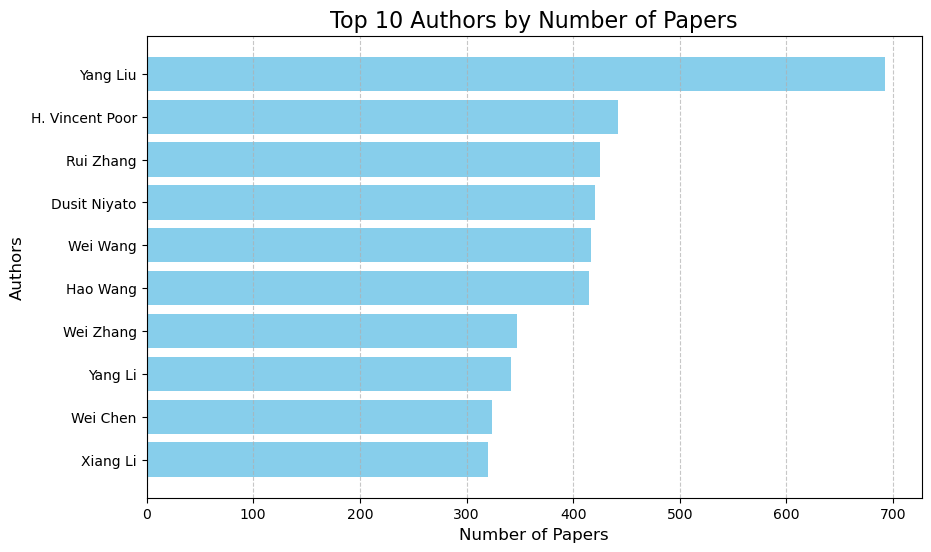

In [30]:
# Vẽ biểu đồ top 10 tác giả
authors, counts = zip(*top_authors)
plt.figure(figsize=(10, 6))
plt.barh(authors, counts, color='skyblue')
plt.xlabel('Number of Papers', fontsize=12)
plt.ylabel('Authors', fontsize=12)
plt.title('Top 10 Authors by Number of Papers', fontsize=16)
plt.gca().invert_yaxis()  # Đảo ngược thứ tự để tác giả có số lượng lớn nhất ở trên cùng
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

**Nhận xét:** 
Biểu đồ trên minh họa số lượng bài báo của 10 tác giả hàng đầu trong lĩnh vực được phân tích. Yang Liu là tác giả dẫn đầu với hơn 600 bài báo, vượt xa các tác giả khác, cho thấy đây là một nhà nghiên cứu rất năng động và có đóng góp lớn. H. Vincent Poor xếp thứ hai với khoảng 450 bài báo, tiếp theo là Rui Zhang và Dusit Niyato, mỗi người có số lượng bài báo dao động từ 350 đến 400. Sự hiện diện của nhiều tác giả có tên phổ biến như Wei Wang, Wei Zhang, Wei Chen gợi ý khả năng trùng lặp tên hoặc sự phổ biến của các nhà nghiên cứu này trong lĩnh vực. Nhìn chung, top 10 tác giả này đại diện cho những cá nhân có ảnh hưởng lớn đến cộng đồng học thuật qua số lượng xuất bản phẩm ấn tượng.

### 5. Top 10 tác giả có số lượng bài viết cao nhất trong 5 lĩnh vực có số lượng bài báo cáo nhất? Từ đó đưa ra các phương hướng tiếp cận cho mọi người có liên quan đến lĩnh vực nghiên cứu.

In [31]:
# Step 1: Tìm các lĩnh vực có số lượng bài báo lớn nhất
categories_split = raw_df['categories'].str.split(',')
category_counts = Counter([category.strip() for sublist in categories_split for category in sublist])
top_categories = [category for category, _ in category_counts.most_common(5)]

# Step 2: Tìm top 5 tác giả cho từng lĩnh vực
top_authors_per_category = {}
for category in top_categories:
    # Lọc các bài báo thuộc lĩnh vực này
    filtered_rows = raw_df[raw_df['categories'].str.contains(category)]
    
    # Tách các tác giả và đếm số lần xuất hiện
    authors_split = filtered_rows['authors'].str.split(',')
    author_counts = Counter([author.strip() for sublist in authors_split for author in sublist])
    
    # Lấy top 5 tác giả
    top_authors_per_category[category] = author_counts.most_common(5)

# Hiển thị kết quả
for category, authors in top_authors_per_category.items():
    print(f"Lĩnh vực: {category}")
    for author, count in authors:
        print(f"  - {author}: {count} bài")
    print()

Lĩnh vực: cs.LG
  - Yang Liu: 205 bài
  - Hao Wang: 153 bài
  - Sergey Levine: 146 bài
  - Bo Li: 143 bài
  - Yoshua Bengio: 135 bài

Lĩnh vực: cs.AI
  - Yang Liu: 200 bài
  - Hao Wang: 123 bài
  - Sergey Levine: 103 bài
  - Huajun Chen: 101 bài
  - Qi Zhang: 100 bài

Lĩnh vực: cs.CV
  - Yu Qiao: 126 bài
  - Yang Liu: 126 bài
  - Hao Chen: 102 bài
  - Lei Zhang: 99 bài
  - Ziwei Liu: 91 bài

Lĩnh vực: cs.CL
  - Preslav Nakov: 129 bài
  - Min Zhang: 125 bài
  - Yang Liu: 121 bài
  - Zhiyuan Liu: 116 bài
  - Huajun Chen: 103 bài

Lĩnh vực: cs.CR
  - Yang Liu: 143 bài
  - Mauro Conti: 110 bài
  - Yang Zhang: 107 bài
  - Michael Backes: 92 bài
  - Bo Li: 90 bài



/tmp/ipykernel_2121/1599789265.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(authors, rotation=45, ha='right')  # Xoay nhãn x để dễ đọc
/tmp/ipykernel_2121/1599789265.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(authors, rotation=45, ha='right')  # Xoay nhãn x để dễ đọc
/tmp/ipykernel_2121/1599789265.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(authors, rotation=45, ha='right')  # Xoay nhãn x để dễ đọc
/tmp/ipykernel_2121/1599789265.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(authors, rotation=45, ha='right')  # Xoay nhãn x để dễ đọc
/tmp/ipykernel_2121/1599789265.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(authors, rotation=45, ha='right')  # Xoay nhãn x để dễ đọc


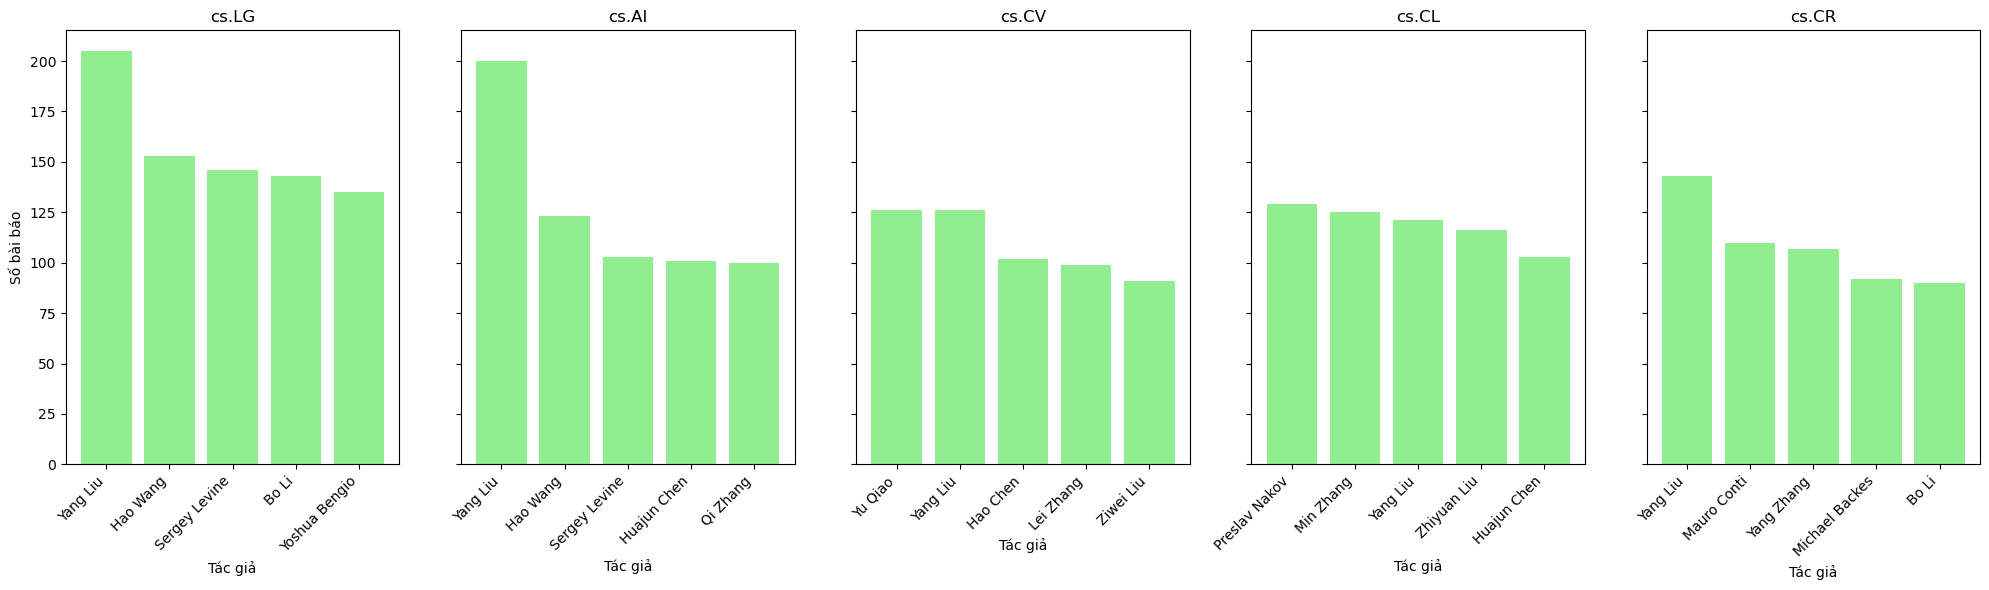

In [32]:
# Thiết lập kích thước và số lượng biểu đồ con (subplot)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

# Vẽ top 5 tác giả cho từng lĩnh vực
for i, (category, authors_data) in enumerate(top_authors_per_category.items()):
    authors, counts = zip(*authors_data)  # Tách tên tác giả và số lượng bài báo
    axes[i].bar(authors, counts, color='lightgreen')  # Vẽ biểu đồ cột
    axes[i].set_title(category)  # Đặt tiêu đề là tên lĩnh vực
    axes[i].set_xticklabels(authors, rotation=45, ha='right')  # Xoay nhãn x để dễ đọc
    axes[i].set_xlabel('Tác giả')
    if i == 0:
        axes[i].set_ylabel('Số bài báo')  # Thêm nhãn trục y cho biểu đồ đầu tiên

# Điều chỉnh khoảng cách và hiển thị
plt.tight_layout()
plt.show()

**Nhận xét:**
- Chủ đề cs.LG (Machine Learning): Yang Liu dẫn đầu với hơn 200 bài báo, vượt trội so với các tác giả khác trong lĩnh vực. Các tác giả như Hao Wang, Sergey Levine, và Bo Li cũng có số lượng bài báo đáng kể (~150 bài mỗi người), thể hiện sự đóng góp quan trọng trong Machine Learning.
- Chủ đề cs.AI (Artificial Intelligence): Yang Liu và Hao Wang tiếp tục chiếm ưu thế với số lượng bài báo cao nhất (~200 bài). Các tác giả còn lại như Sergey Levine, Huajun Chen, và Qi Zhang có mức đóng góp đồng đều, xấp xỉ 150 bài.
- Chủ đề cs.CV (Computer Vision): Không có sự áp đảo hoàn toàn, các tác giả Xi Qiao, Yang Liu, và Hao Chen có số lượng bài báo tương đồng. Lĩnh vực này có sự cạnh tranh cao, với sự góp mặt của nhiều nhà nghiên cứu nổi bật.
- Chủ đề cs.CL (Computational Linguistics): Preslav Nakov dẫn đầu, tiếp theo là Min Zhang và Yang Liu, tất cả đều có số lượng bài báo gần như ngang nhau (~100 bài). Điều này cho thấy Computational Linguistics là một lĩnh vực với sự đóng góp đa dạng từ nhiều tác giả.
- Chủ đề cs.CR (Cryptography and Security): Yang Liu tiếp tục dẫn đầu, cho thấy sự tham gia rộng rãi của tác giả này trong nhiều lĩnh vực. Các tác giả như Mauro Conti và Bo Li cũng có đóng góp quan trọng trong lĩnh vực bảo mật.
- Lợi ích của phân tích này đối với nhà nghiên cứu:
    - Xác định tác giả chủ chốt: Biểu đồ giúp các nhà nghiên cứu nhanh chóng nhận diện những tác giả hàng đầu trong từng lĩnh vực, hỗ trợ việc tìm kiếm tài liệu hoặc hợp tác khoa học.
    - Hỗ trợ định hướng nghiên cứu: Những người mới vào lĩnh vực có thể sử dụng thông tin này để theo dõi các xu hướng nghiên cứu chính, các bài báo nổi bật từ các tác giả hàng đầu.
    - Tăng cường cơ hội hợp tác: Việc biết ai đang dẫn đầu trong các lĩnh vực cụ thể sẽ giúp các nhà khoa học tiếp cận đúng người để hợp tác hoặc tham khảo tài liệu.
    - Tiện lợi trong việc tìm nguồn tài liệu: Dựa trên danh sách tác giả hàng đầu, nhà nghiên cứu có thể ưu tiên đọc các bài báo của họ để hiểu rõ hơn về các chủ đề quan trọng.

### 6. Các từ khóa đặc trưng nhất trong 6 mỗi chủ đề có số lượng bài báo cao nhất?

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sinhtruc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


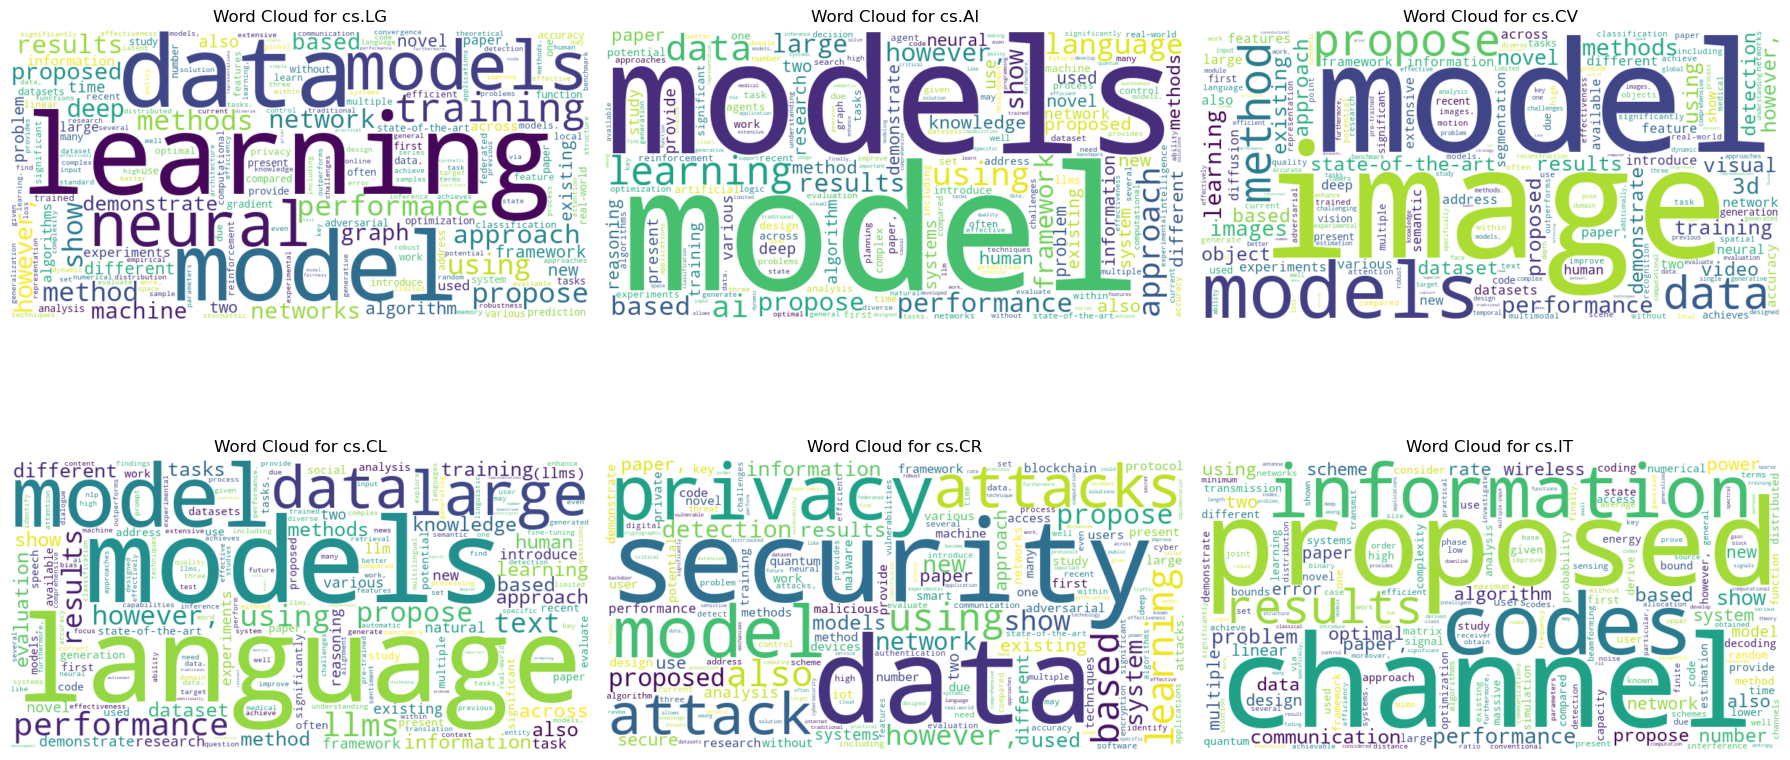

In [33]:
# Tải các stopwords tiếng Anh từ thư viện nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))  # Lưu các stopwords vào một tập hợp để sử dụng sau

# Tách các danh mục từ cột 'categories' thành danh sách và lưu vào cột 'categories_list'
raw_df['categories_list'] = raw_df['categories'].str.split(',')

# Tách toàn bộ danh sách danh mục từ cột 'categories'
categories_split = raw_df['categories'].str.split(',')

# Đếm tần suất xuất hiện của từng danh mục trong tất cả bài báo
category_counts = Counter([category.strip() for sublist in categories_split for category in sublist])

# Lấy 5 danh mục phổ biến nhất (thêm 1 phần tử để hiển thị đầy đủ trên đồ thị)
top_5_categories = [category for category, _ in category_counts.most_common(6)]

# Tạo không gian biểu đồ cho 6 danh mục (2 hàng, 3 cột)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Duyệt qua từng danh mục phổ biến nhất
for ax, category in zip(axes.flatten(), top_5_categories):
    # Lọc các bài báo thuộc danh mục đang xử lý
    subset = raw_df[raw_df['categories_list'].apply(lambda x: category in x)]
  
    # Gộp tất cả các abstract thành một chuỗi văn bản dài
    text = " ".join(subset['abstract'].fillna("").tolist())
   
    # Xử lý văn bản: chuyển tất cả từ sang chữ thường và loại bỏ stopwords
    words = [word.lower() for word in text.split() if word.lower() not in stop_words]
    word_counts = Counter(words)  # Đếm tần suất các từ sau khi loại bỏ stopwords
    
    # Tạo Word Cloud từ tần suất các từ
    wc = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
    ax.imshow(wc, interpolation="bilinear")  # Hiển thị Word Cloud trên biểu đồ
    ax.axis("off")  # Tắt khung và trục tọa độ
    ax.set_title(f"Word Cloud for {category}")  # Đặt tiêu đề cho Word Cloud

# Căn chỉnh không gian giữa các biểu đồ và hiển thị chúng
plt.tight_layout()
plt.show()


1. cs.LG (Learning Systems - Học máy)
Từ khóa nổi bật: "model", "learning", "data", "performance", "training", "approach", "neural", "methods".

⇒ Chủ đề tập trung vào các thuật toán học máy, hiệu suất, và cách tiếp cận học sâu (deep learning).

2. cs.AI (Artificial Intelligence - Trí tuệ nhân tạo)
Từ khóa nổi bật: "model", "data", "using", "propose", "methods", "framework".

⇒ Chủ yếu xoay quanh phát triển các phương pháp AI sử dụng dữ liệu lớn và cách mô hình hóa.

3. cs.CV (Computer Vision - Thị giác máy tính)
Từ khóa nổi bật: "model", "images", "data", "propose", "methods", "visual".

⇒ Chủ đề về xử lý hình ảnh, phân tích dữ liệu trực quan, và mô hình hóa thông qua công nghệ xử lý ảnh.

4. cs.CL (Computational Linguistics - Xử lý ngôn ngữ tự nhiên)
Từ khóa nổi bật: "language", "models", "text", "data", "performance", "different".

⇒ Tập trung xử lý văn bản, ngôn ngữ tự nhiên và nghiên cứu trên các mô hình xử lý văn bản.

5. cs.CR (Cryptography and Security - Mật mã học và An ninh)
Từ khóa nổi bật: "security", "privacy", "data", "attacks", "propose", "model".

⇒ Các vấn đề về bảo mật, quyền riêng tư và phương pháp phòng ngừa tấn công mạng.

6. cs.IT (Information Theory - Lý thuyết Thông tin)
Từ khóa nổi bật: "information", "codes", "data", "proposed", "machine", "transmission".

⇒ Nhấn mạnh đến lý thuyết truyền tải thông tin, mã hóa và hiệu quả truyền tin.

**Nhận xét:**
- Đặc điểm chung: Tất cả chủ đề đều chia sẻ các từ khóa chung như "model", "data", và "propose", điều này cho thấy rằng hầu hết các lĩnh vực đều liên quan đến xây dựng mô hình, sử dụng dữ liệu, và đề xuất phương pháp mới.
- Đặc điểm riêng: Mỗi chủ đề có từ khóa phản ánh lĩnh vực trọng tâm của nó. Ví dụ, cs.CV nhấn mạnh "images", cs.CL chú trọng "language" và "text", trong khi cs.CR có "security" và "privacy".
- Kết quả trực quan: Đám mây từ khóa đã thành công trong việc làm nổi bật các từ khóa chính cho từng chủ đề, từ đó giúp người đọc dễ dàng nắm bắt nội dung quan trọng.

### 7. Liên hệ giữa độ dài tóm tắt và 10 chủ đề có số lượng bài báo cao nhất?

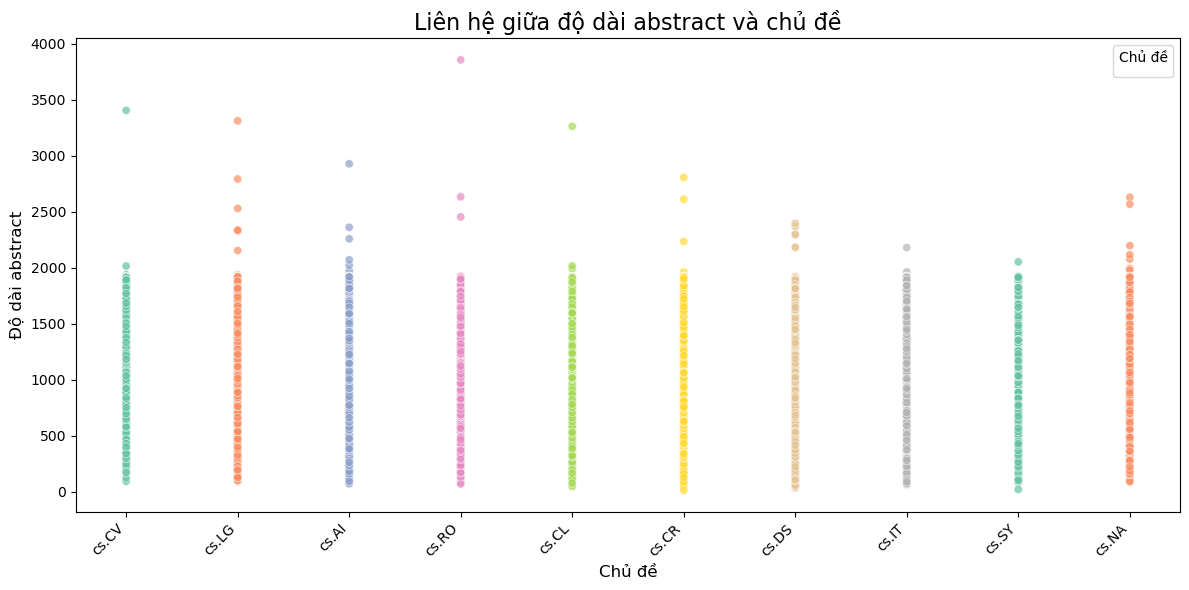

In [34]:
# Bước 1: Tính độ dài của mỗi abstract và lưu vào cột mới 'abstract_length'
raw_df['abstract_length'] = raw_df['abstract'].fillna("").apply(len)

# Bước 2: Đếm số lần xuất hiện của từng loại chủ đề trong danh sách 'categories_split'
category_counts = Counter([category.strip() for sublist in categories_split for category in sublist])

# Bước 3: Lấy top 10 chủ đề có số lượng bài báo lớn nhất
top_categories = [category for category, _ in category_counts.most_common(10)]  # Top 10 lĩnh vực

# Bước 4: Mở rộng dữ liệu bằng cách phân tách các phần tử trong 'categories_list' thành các dòng riêng biệt
expanded_data = raw_df.explode('categories_list')

# Bước 5: Lọc dữ liệu để chỉ giữ lại các dòng với chủ đề thuộc top 10
expanded_data = expanded_data[expanded_data['categories_list'].isin(top_categories)]

# Bước 6: Vẽ biểu đồ scatter plot để thể hiện mối liên hệ giữa độ dài abstract và chủ đề
plt.figure(figsize=(12, 6))  # Xác định kích thước của biểu đồ
sns.scatterplot(
    data=expanded_data,  # Dữ liệu cho biểu đồ
    x="categories_list",  # Trục x là 'categories_list' (chủ đề)
    y="abstract_length",  # Trục y là 'abstract_length' (độ dài abstract)
    hue="categories_list",  # Tô màu các điểm theo chủ đề
    palette="Set2",  # Bảng màu 'Set2' cho các chủ đề
    alpha=0.7,  # Độ trong suốt của các điểm trên biểu đồ
    legend=False  # Tắt hiển thị legend
)

# Bước 7: Chỉnh sửa tiêu đề và nhãn cho các trục
plt.title("Liên hệ giữa độ dài abstract và chủ đề", fontsize=16)
plt.xlabel("Chủ đề", fontsize=12)
plt.ylabel("Độ dài abstract", fontsize=12)

# Bước 8: Quay các nhãn trên trục x để dễ đọc
plt.xticks(rotation=45, ha="right")

# Bước 9: Cập nhật legend (nếu cần) để hiển thị đúng các chủ đề
handles, labels = plt.gca().get_legend_handles_labels()  # Lấy các handle và nhãn từ biểu đồ
plt.legend(handles, labels, title="Chủ đề", loc="upper right", fontsize=10)

# Bước 10: Đảm bảo biểu đồ không bị cắt khi hiển thị
plt.tight_layout()

# Bước 11: Hiển thị biểu đồ
plt.show()


**Nhận xét:**
- Biểu đồ cho thấy mối liên hệ giữa độ dài abstract và 10 lĩnh vực nghiên cứu có số lượng bài báo cao nhất. Các lĩnh vực như cs.CV (Computer Vision) và cs.LG (Machine Learning) có sự phân bố abstract khá rộng, với nhiều bài báo có abstract dài vượt trội (>2000 ký tự), phản ánh tính phức tạp và chi tiết của nghiên cứu. Trong khi đó, các lĩnh vực như cs.IT (Information Theory) và cs.SY (Systems) có abstract ngắn hơn, phù hợp với tính chất khái quát và tập trung của nghiên cứu.

- Những phát hiện này mang ý nghĩa quan trọng khi xây dựng mô hình NLP. Abstract dài đòi hỏi xử lý chuyên sâu, như rút gọn hoặc sử dụng các kiến trúc như Transformer để duy trì ngữ nghĩa. Việc cân bằng dữ liệu và chọn kỹ thuật xử lý văn bản theo từng lĩnh vực sẽ giúp tối ưu hiệu suất mô hình trong phân loại hoặc phân tích văn bản nghiên cứu.

### 8. Số lượng bài báo có chủ đề công nghệ thông tin? Và từ đó cho thấy các lĩnh vực nghiên cứu nào xuất hiện nhiều nhất trong dữ liệu?

In [35]:

categories_series = raw_df['categories'].str.split(',')

all_categories = []
for sublist in categories_series:
    for category in sublist:
        all_categories.append(category.strip())


category_counts = Counter(all_categories)


category_counts_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

# Lọc chỉ các danh mục bắt đầu với "cs."
cs_categories = category_counts_df[category_counts_df['Category'].str.startswith('cs.')].reset_index(drop=True)
cs_categories

,Category,Count
0,cs.LG,75872
1,cs.AI,54147
2,cs.CV,35064
3,cs.CL,33214
4,cs.CR,27859
5,cs.IT,27557
6,cs.RO,26638
7,cs.SY,25674
8,cs.DS,25082
9,cs.NA,24309


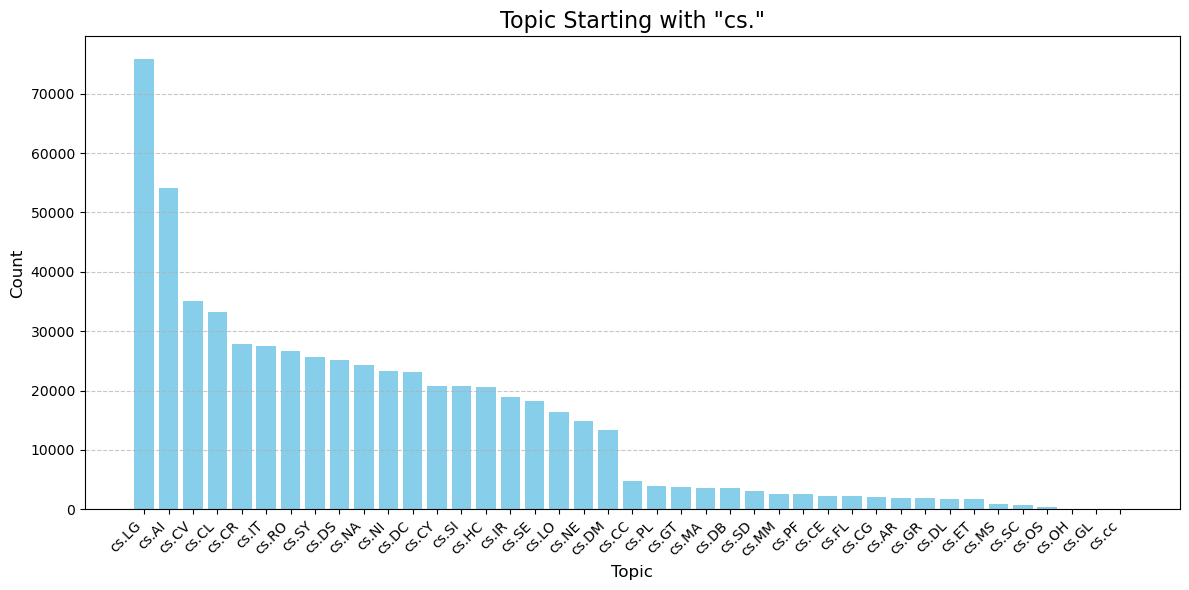

In [36]:
plt.figure(figsize=(12, 6))
plt.bar(cs_categories['Category'], cs_categories['Count'], color='skyblue')
plt.title('Topic Starting with "cs."', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Xu hướng nghiên cứu tập trung chủ yếu vào các lĩnh vực Machine Learning (cs.LG), AI (cs.AI), và Computer Vision (cs.CV).
- Các chủ đề liên quan đến bảo mật (cs.CR), lý thuyết thông tin (cs.IT), thuật toán (cs.DS), và robot (cs.RO) cũng nhận được sự quan tâm đáng kể.
- Một số chủ đề truyền thống như Operating Systems (cs.OS) hoặc Computational Complexity (cs.CC) hiện có ít nghiên cứu hơn, phản ánh sự thay đổi ưu tiên trong cộng đồng khoa học máy tính.

### Với sự khám phá ở câu hỏi số 8. 
Chúng em nhận thấy rằng các chủ đề ở sau có khá ít bài báo. Dẫn đến khi huấn luyện sẽ ảnh hưởng đến độ chính xác của mô hình. Vậy nên nhóm chúng em chọn ra 20 chủ đề với số lượng bài báo là cao nhất.

In [37]:
dict_category = {}
for id, key in enumerate(cs_categories['Category']):
    if id < 20: # 20 chủ đề với số lượng bài báo cao nhất
        dict_category[key] = 1
    else:
        dict_category[key] = 0
# Định nghĩa hàm điều kiện
def condition_to_delete(x):
    for category in x.split(','):
        if dict_category[category.strip()] == 0:
            return True
    return False

# Áp dụng hàm để lọc các dòng
raw_df = raw_df[~raw_df['categories'].apply(condition_to_delete)]
raw_df.shape

(314049, 12)

In [38]:
raw_df

,paper_id,authors,updated,published,title,abstract,categories,comment,topic_count,published_year,categories_list,abstract_length
0,2412.10373v1,"Sicheng Zuo,Wenzhao Zheng,Yuanhui Huang,Jie Zh...",2024-12-13 18:59:54,2024-12-13 18:59:54,GaussianWorld: Gaussian World Model for Stream...,3D occupancy prediction is important for aut...,"cs.CV, cs.AI, cs.LG",Code is available at: https://github.com/zuosc...,3,2024,"[cs.CV, cs.AI, cs.LG]",1276
1,2412.10371v1,"Wenzhao Zheng,Junjie Wu,Yao Zheng,Sicheng Zuo,...",2024-12-13 18:59:30,2024-12-13 18:59:30,GaussianAD: Gaussian-Centric End-to-End Autono...,Vision-based autonomous driving shows great ...,"cs.CV, cs.AI, cs.LG, cs.RO",Code is available at: https://github.com/wzzhe...,4,2024,"[cs.CV, cs.AI, cs.LG, cs.RO]",1283
2,2402.01886v2,"Mark Beliaev,Ramtin Pedarsani",2024-12-13 18:59:14,2024-02-02 20:21:09,Inverse Reinforcement Learning by Estimating E...,"In Imitation Learning (IL), utilizing subopt...","cs.LG, cs.AI","11 pages, 4 figures, extended version of AAAI ...",2,2024,"[cs.LG, cs.AI]",1174
3,2412.10360v1,"Orr Zohar,Xiaohan Wang,Yann Dubois,Nikhil Meht...",2024-12-13 18:53:24,2024-12-13 18:53:24,Apollo: An Exploration of Video Understanding ...,Despite the rapid integration of video perce...,"cs.CV, cs.AI",https://apollo-lmms.github.io,2,2024,"[cs.CV, cs.AI]",1599
4,2412.10354v1,"Jean Kossaifi,Nikola Kovachki,Zongyi Li,Davit ...",2024-12-13 18:49:37,2024-12-13 18:49:37,A Library for Learning Neural Operators,"We present NeuralOperator, an open-source Py...","cs.LG, cs.AI",Not available,2,2024,"[cs.LG, cs.AI]",673
...,...,...,...,...,...,...,...,...,...,...,...,...
354967,2405.16585v1,"Yuhang Chen,Wenke Huang,Mang Ye",2024-05-26 14:29:10,2024-05-26 14:29:10,Fair Federated Learning under Domain Skew with...,Federated learning (FL) has emerged as a new...,"cs.LG, cs.AI",Accepted by CVPR2024,2,2024,"[cs.LG, cs.AI]",1506
354968,2404.14786v2,"Peiwen Li,Xin Wang,Zeyang Zhang,Yuan Meng,Fang...",2024-05-26 13:08:00,2024-04-23 06:52:40,RealTCD: Temporal Causal Discovery from Interv...,In the field of Artificial Intelligence for ...,"cs.AI, cs.LG",Not available,2,2024,"[cs.AI, cs.LG]",1920
354969,2405.16557v1,"Chun-Kai Huang,Yi-Hsien Hsieh,Ta-Jung Chien,Li...",2024-05-26 13:06:45,2024-05-26 13:06:45,Scalable Numerical Embeddings for Multivariate...,"Multivariate time series (MTS) data, when sa...","cs.LG, cs.AI",Not available,2,2024,"[cs.LG, cs.AI]",1609
354970,2304.05749v2,"Yuxing Tian,Mingjie Zhu,Jiachi Luo,Song Li",2024-05-26 10:47:29,2023-04-12 10:05:07,Boosting long-term forecasting performance for...,This study focuses on long-term forecasting ...,"cs.LG, cs.AI",Recent evidence has emerged that directly cont...,2,2023,"[cs.LG, cs.AI]",1117


In [39]:
from sklearn.preprocessing import MultiLabelBinarizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Khởi tạo lại các biến và cài đặt cần thiết
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Chuyển đổi categories thành danh sách nhãn
raw_df['categorieslist'] = raw_df['categories'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(raw_df['categorieslist'])
labels = mlb.classes_

# Tiền xử lý text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

raw_df['text'] = raw_df['title'] + " " + raw_df['abstract']
raw_df['text'] = raw_df['text'].str.lower()
raw_df['text'] = raw_df['text'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
raw_df['text'] = raw_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
raw_df['text'] = raw_df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Tạo DataFrame kết hợp X và Y
X_Y_df = pd.DataFrame(raw_df['text'])  # Bắt đầu với cột 'text'
for i, label in enumerate(labels):    # Thêm mỗi nhãn vào DataFrame
    X_Y_df[label] = Y[:, i]

# Lưu vào file CSV
output_file = 'processed_arxiv_cs_papers.csv'
X_Y_df.to_csv(output_file, index=False)
print(f"File đã được lưu tại: {output_file}")


[nltk_data] Downloading package punkt to /home/sinhtruc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sinhtruc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sinhtruc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/tmp/ipykernel_2121/1455524592.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df['categorieslist'] = raw_df['categories'].apply(lambda x: x.split(', '))
/tmp/ipykernel_2121/1455524592.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

File đã được lưu tại: processed_arxiv_cs_papers.csv


### 9. Mối liên hệ giữa các chủ đề trong một bài báo? 

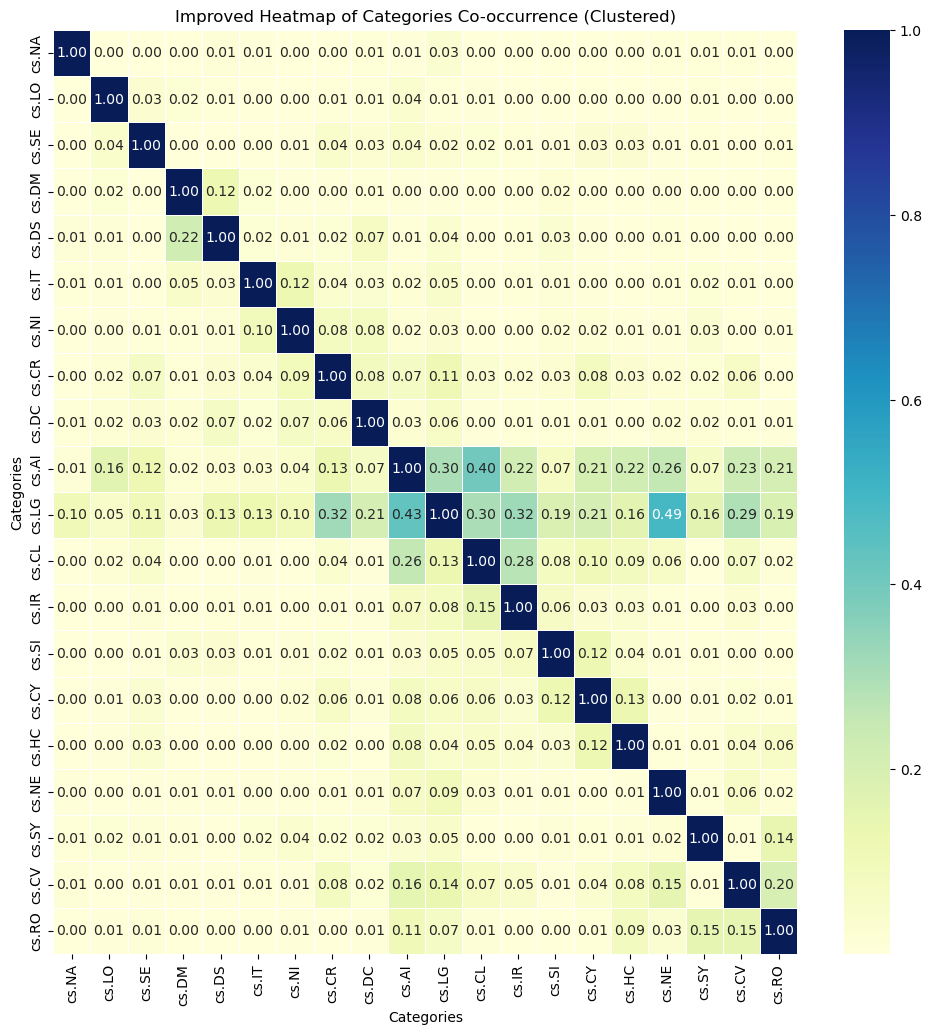

In [40]:
from scipy.cluster.hierarchy import linkage, leaves_list

data = pd.read_csv("processed_arxiv_cs_papers.csv")

# Lấy các cột chủ đề (bỏ cột 'text')
topic_columns = data.columns.drop("text")
binary_matrix = data[topic_columns]

# Tính ma trận đồng xuất hiện
cooccurrence_matrix = binary_matrix.T.dot(binary_matrix)

# Chuẩn hóa ma trận
normalized_matrix = cooccurrence_matrix.copy()

for i in range(len(normalized_matrix)):
    diagonal_value = cooccurrence_matrix.iloc[i, i]  # Giá trị đường chéo chính [i][i]
    if diagonal_value > 0:  # Đảm bảo không chia cho 0
        normalized_matrix.iloc[:, i] = cooccurrence_matrix.iloc[:, i] / diagonal_value


# Áp dụng phân cụm để sắp xếp các chủ đề theo nhóm
linkage_matrix = linkage(normalized_matrix, method="average")  # Sử dụng phương pháp phân cụm trung bình
order = leaves_list(linkage_matrix)  # Lấy thứ tự các hàng/cột sau phân cụm

# Sắp xếp lại ma trận theo thứ tự phân cụm
clustered_matrix = normalized_matrix.iloc[order, order]
clustered_matrix.columns = [normalized_matrix.columns[i] for i in order]
clustered_matrix.index = [normalized_matrix.index[i] for i in order]

# Vẽ Heatmap sau khi sắp xếp
plt.figure(figsize=(12, 12))
sns.heatmap(clustered_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

plt.title("Improved Heatmap of Categories Co-occurrence (Clustered)")
plt.xlabel("Categories")
plt.ylabel("Categories")
plt.show()


#### 1. Môi tương quan giữa các chủ đề:
- Một số chủ đề có mối liên kết mạnh mẽ với các chủ đề khác như:
    - **cs.AI (Artificial Intelligence)**:

        - Có giá trị đồng xuất hiện cao nhất với **cs.LG** (0.432156), thể hiện rằng các bài báo về trí tuệ nhân tạo thường liên quan mật thiết đến Machine Learning.
        - Mối quan hệ mạnh với **cs.CL** (0.255345) và **cs.CV** (0.156322), cho thấy AI thường xuất hiện trong các bài toán xử lý ngôn ngữ tự nhiên và thị giác máy tính.
    
    - **cs.LG (Machine Learning)**:

        - Ngoài mối quan hệ với cs.AI, còn liên kết chặt chẽ với **cs.CV** (0.136122) và **cs.IR** (0.077391). Điều này phản ánh rằng Machine Learning là công cụ phổ biến trong các bài toán thị giác máy tính và tìm kiếm thông tin.
        - Có giá trị cao với **cs.CR** (0.114811) và **cs.NI** (0.096274), cho thấy Machine Learning cũng thường xuất hiện trong bảo mật và mạng.

    - **cs.CL (Computational Linguistics)**:

        - Đồng xuất hiện mạnh với **cs.AI** (0.255345) và **cs.LG** (0.131396), phản ánh tầm quan trọng của AI và Machine Learning trong xử lý ngôn ngữ tự nhiên.
        - Có giá trị tương đối với **cs.IR** (0.149480), thể hiện sự liên kết giữa xử lý ngôn ngữ tự nhiên và tìm kiếm thông tin.

- Các chủ đề có mỗi liên kết trung bình như:
    - **cs.CR (Cryptography and Security)**:

        - Có giá trị cao với **cs.NI** (0.090430), phản ánh mối quan hệ tự nhiên giữa bảo mật và mạng.
        - Đồng xuất hiện với **cs.LG** (0.114811) và **cs.SE** (0.069097), gợi ý rằng các thuật toán Machine Learning và phần mềm có thể đóng vai trò quan trọng trong các nghiên cứu về bảo mật.

    - **cs.SE (Software Engineering)**:

        - Giá trị cao với **cs.CR** (0.069097) và **cs.DC** (0.026399), thể hiện rằng bảo mật và điện toán phân tán là những lĩnh vực liên quan chặt chẽ đến kỹ thuật phần mềm.
        - Đồng xuất hiện đáng kể với **cs.AI** (0.121280), cho thấy các ứng dụng của AI trong phát triển phần mềm.

    - **cs.DS (Data Structures and Algorithms)**:

        - Có liên kết mạnh với **cs.DM** (0.221030), do các nghiên cứu về thuật toán thường bao gồm các lý thuyết và cấu trúc dữ liệu.
        - Liên kết vừa phải với **cs.AI** (0.027362) và **cs.LG** (0.036714), phản ánh việc sử dụng thuật toán trong Machine Learning và AI.

#### 2. Các Nhóm chủ đề thường đi với nhau:
- Nhóm AI và Machine Learning:

    - **cs.AI, cs.LG, cs.CV, cs.CL, cs.IR**.
    - Đây là các lĩnh vực đồng xuất hiện phổ biến, cho thấy Machine Learning và AI đóng vai trò cốt lõi trong các nghiên cứu về xử lý ngôn ngữ tự nhiên, thị giác máy tính, và tìm kiếm thông tin.

- Nhóm bảo mật và mạng:

    - **cs.CR, cs.NI, cs.DC, cs.SE**.
    - Các chủ đề này có liên kết mạnh mẽ với nhau, phản ánh xu hướng tích hợp bảo mật trong mạng và điện toán phân tán.
